# Topics
## 1. A Deeper Understanding of Objects in Python
## 2. Relaxation Method


## Everything in Python is an Object...for example:

In [1]:
''' 
a = 2 in python has a very different meaning
from int a = 2 in c.
'''
a = 2
b = int(3)
print a, b
# __...__ : double underscore, or "dunder"
print dir(a)

2 3
['__abs__', '__add__', '__and__', '__class__', '__cmp__', '__coerce__', '__delattr__', '__div__', '__divmod__', '__doc__', '__float__', '__floordiv__', '__format__', '__getattribute__', '__getnewargs__', '__hash__', '__hex__', '__index__', '__init__', '__int__', '__invert__', '__long__', '__lshift__', '__mod__', '__mul__', '__neg__', '__new__', '__nonzero__', '__oct__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmod__', '__rmul__', '__ror__', '__rpow__', '__rrshift__', '__rshift__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__trunc__', '__xor__', 'bit_length', 'conjugate', 'denominator', 'imag', 'numerator', 'real']


In [2]:
print a.__abs__(), b.__abs__()

2 3


In [3]:
# The default value at instantiation is 0
c = int()
print c

0


In [4]:
# Is it legal? If so, what does this mean? If not, why not? 
gint = int

In [5]:
d = gint(4)
print d, type(d)

4 <type 'int'>


In [6]:
class hint(int):
    pass

e = hint(5)
print e, type(e)
print isinstance(e, hint), isinstance(e, int)

5 <class '__main__.hint'>
True True


In [7]:
# Is this ok?
print (-5).__abs__()

5


## Relaxation Methods: The Jacobi Method
### Solving a linear set of equations

In [81]:
import numpy as np

max_iter = 100

# initialize the matrix
A = np.array([[10., -1., 2., 0.],
              [-1., 11., -1., 3.],
              [2., -1., 10., -1.],
              [0.0, 3., -1., 8.]])

D = np.diag(A)
print "The diagonal elements:\n", D
print "The diagonal matrix:\n", np.diagflat(D)
R = A - np.diagflat(D)
print "The remainder matrix:\n", R

# initialize the RHS vector
b = np.array([6., 25., -11., 15.])


# prints the linear system
print("System of Linear Equations:")
for i in range(A.shape[0]):
    row = ["{}*x{}".format(A[i, j], j + 1) for j in range(A.shape[1])]
    print " + ".join(row) + "=" + str(b[i])
print '\n\n'

# Initial Guess: Usually you would want an "educated" guess, 
# typcially x_guess = D^(-1)b. 
# But because the method is so robust, it hardly matters...
# We will try all 0's and a set of random numbers.
#x = np.zeros(b.shape)
x = np.random.rand(b.shape[0])
# specify tolerance
tol = 1e-4

counter = 0
print 'Starting Jacobi method iterations...'
while counter < max_iter:
    print "Iteration {:d}:{}".format(counter, x)
    # Just to create a numpy array that has the same dimension as x.
    x_new = np.empty(x.shape)

    for i in range(A.shape[0]):
        # np.dot computes dot product
        
        s = np.dot(R[i,], x)
        x_new[i] = (b[i] - s) / A[i, i]
            
    counter += 1      
    # Returns True if two arrays are element-wise equal within a tolerance.
    if np.allclose(x, x_new, rtol=tol):
        print 'Tolerance achieved.  Printing results...'
        break      
    else:
        if counter == max_iter:
            raise Exception('max_iter exceeded!')

    x = x_new

print '\n\n'
print "Solution:", x 
print "Estimated Error:", (np.dot(A, x) - b)/b 

The diagonal elements:
[ 10.  11.  10.   8.]
The diagonal matrix:
[[ 10.   0.   0.   0.]
 [  0.  11.   0.   0.]
 [  0.   0.  10.   0.]
 [  0.   0.   0.   8.]]
The remainder matrix:
[[ 0. -1.  2.  0.]
 [-1.  0. -1.  3.]
 [ 2. -1.  0. -1.]
 [ 0.  3. -1.  0.]]
System of Linear Equations:
10.0*x1 + -1.0*x2 + 2.0*x3 + 0.0*x4=6.0
-1.0*x1 + 11.0*x2 + -1.0*x3 + 3.0*x4=25.0
2.0*x1 + -1.0*x2 + 10.0*x3 + -1.0*x4=-11.0
0.0*x1 + 3.0*x2 + -1.0*x3 + 8.0*x4=15.0



Starting Jacobi method iterations...
Iteration 0:[ 0.57517072  0.71293921  0.60678973  0.46853355]
Iteration 1:[ 0.54993597  2.25239635 -1.09688687  1.68349651]
Iteration 2:[ 1.04461701  1.76386905 -0.81639791  0.89324051]
Iteration 3:[ 0.93966649  2.04986341 -1.04321245  1.11149937]
Iteration 4:[ 1.01362883  1.96017781 -0.97179702  0.97589966]
Iteration 5:[ 0.99037719  2.01037571 -1.00911802  1.01845869]
Iteration 6:[ 1.00286117  1.9932621  -0.995192    0.99496936]
Iteration 7:[ 0.99836461  2.00206919 -1.00174909  1.00312771]
Iteration 8:[

In [24]:
import numpy as np

z = np.empty((5,2))
print z
print z.shape[0]
w = np.zeros(z.shape)
print w


[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
5
[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


## Relaxation Methods: The Laplace Equation


More at http://en.wikipedia.org/wiki/Relaxation_(iterative_method)

## The Physics:
### This corresponds to the electric potential of a parallel plate capacitor 
### (length, width >> thickness)

[ 0.          0.09998692  0.19997634  0.29996902  0.39996537  0.49996537
  0.59996867  0.69997466  0.79998249  0.89999124  1.        ]


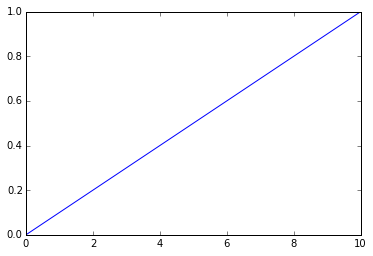

In [82]:
%matplotlib inline
import sys
import numpy as np
import matplotlib.pyplot as plt

NX = 11

#initialization
V = np.zeros(NX)

#Boundary Conditions:
V[NX-1] = 1.
V[0] = 0
maxdiff = 1e-6
diff = 1
x = np.arange(NX)

while diff > maxdiff:
    diff = 0.
    for i in range(1, NX-1):    # start from 1 and end at NX-1: because you don't want to change the BC!!!!  
        newV = (V[i-1]+V[i+1])/2
        diff = abs(newV - V[i])
        V[i] = newV
   
            
print V
plt.plot(x, V)
plt.show()
          

[ 0.90851584  0.38206606  0.58364639  0.87947275  0.43634865  0.00935054
  0.91442078  0.20858592  0.82405495  0.56919712  0.61136766]
[ 0.          0.0999864   0.19997541  0.29996781  0.39996401  0.49996401
  0.59996744  0.69997366  0.7999818   0.8999909   1.        ]


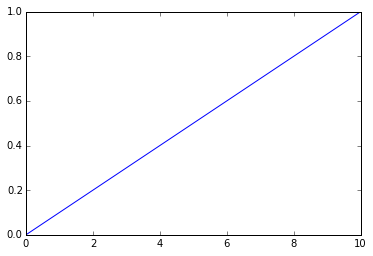

In [149]:
%matplotlib inline
# I can use random numbers to initialize the interior points.

import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

NX = 11

#initialization
V = rand(NX)    #yes I can initialize with random numbers!


#V = rand(NX)*1e12    # or even crazily large random numbers!

print V

#Boundary Conditions:
V[NX-1] = 1.
V[0] = 0
maxdiff = 1e-6
diff = 1
x = np.arange(NX)

while diff > maxdiff:
    for i in range(1, NX-1):    # start from 1 and end at NX-1: because you don't want to change the BC!!!!  
        newV = (V[i-1]+V[i+1])/2
        diff = abs(newV - V[i])
        V[i] = newV
 
  
            
print V
plt.plot(x, V)
plt.show()

# A very robust method!
        

## Breakout Problem:
### For a long rectangular tube (say 10 by 10), the potential on two opposite sides = 1 volt, and the potential on the other two sides = 0.  
### Write a program to find V(x, y) in the interior of the tube. 
### Then plot the result as a surface plot.

## We will see the connection between PDE and linear algebra next week.

## End of week 7-2

[[ 1.          0.          0.          1.        ]
 [ 1.          0.79978831  0.65402617  1.        ]
 [ 1.          0.93287031  0.32908797  1.        ]
 [ 1.          0.          0.          1.        ]]
[[ 1.          0.          0.          1.        ]
 [ 1.          0.66666659  0.66666673  1.        ]
 [ 1.          0.66666668  0.66666665  1.        ]
 [ 1.          0.          0.          1.        ]]


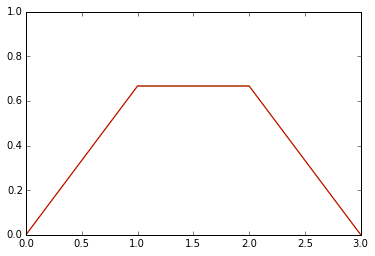

In [190]:
%matplotlib inline
# I can use random numbers to initialize the interior points.

import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

NX = 4
NY = 4
#initialization
V = rand(NX, NY)    #yes I can initialize with random numbers!

#V = rand(NX)*1e12    # or even crazily large random numbers!



#Boundary Conditions:
V[NX-1,:] = 0
V[0,:] = 0
V[:,NY-1] = 1.
V[:,0] = 1.

print V

maxdiff = 1e-6
diff = 1
x = np.arange(NX)


while diff > maxdiff:
    #diff = 0.
    for i in range(1, NX-1):    # start from 1 and end at NX-1: because you don't want to change the BC!!!!  
        for j in range(1,NY-1):
            newV = (V[(i-1),(j-1)]+V[(i+1),(j+1)]+V[(i-1),(j+1)]+V[(i+1),(j-1)])/4
            diff = abs(newV - V[i,j])
            V[i,j] = newV
 

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')


            
print V
plt.plot(x, V)
plt.show()


# A very robust method!